In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset from pickle file
import pickle
quora_data=pickle.load(open('final_data.p','rb'))

In [3]:
#Printing the top 5 rows from the dataset
quora_data.head()

,qid,question_text,target,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,pre_essays,bad_words_count,preprocessed_questions
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,6,1,53,0,how quebec nationalists see province nation 1960s,0,how quebec nationalists see province nation 1960s
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,8,2,63,0,do adopted dog would encourage people adopt no...,0,do adopt dog would encourage people adopt not ...
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,1,2,54,0,why velocity affect time does velocity affect ...,0,why velocity affect time do velocity affect sp...
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,2,1,44,0,how otto von guericke used magdeburg hemispheres,0,how otto von guericke use magdeburg hemispheres
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,5,1,59,0,can i convert montra helicon d mountain bike c...,0,can i convert montra helicon d mountain bike c...


<h1>Splitting the dataset into train and test</h1>

In [4]:
from sklearn.model_selection import train_test_split
y=quora_data['target']

x_train,x_test,y_train,y_test=train_test_split(quora_data.drop('target',axis=1),y,test_size=0.33,stratify=y,random_state=42)
print("After Splitting")
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

After Splitting
(875101, 11) (875101,)
(431021, 11) (431021,)


1.There are around 0.8M data points in the training dataset with 9 features.<br>
2.There are around 0.4M data points in the testing dataset with 9 features

<h1>TFIDF Representation of text</h1>

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(ngram_range=(1,3),min_df=8,max_features=15000,use_idf=True,norm='l2') #Generating trigrams
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_tfidf.shape,y_train.shape)
print(x_test_questions_tfidf.shape,y_test.shape)

Shapes After Performing Vectorization
(875101, 15000) (875101,)
(431021, 15000) (431021,)


In [6]:
#Getting all the words which were used in 
unique_words=vec.get_feature_names()
print(unique_words)

en', 'what happen eat', 'what happen get', 'what happen not', 'what happen person', 'what happen someone', 'what happen take', 'what hardest', 'what hate', 'what health', 'what health benefit', 'what healthy', 'what height', 'what help', 'what helpful', 'what hide', 'what high', 'what highest', 'what highlight', 'what hire', 'what hire process', 'what historical', 'what history', 'what history behind', 'what home', 'what human', 'what idea', 'what ideal', 'what ideas', 'what impact', 'what implications', 'what importance', 'what important', 'what important thing', 'what important things', 'what improve', 'what increase', 'what india', 'what indian', 'what influence', 'what information', 'what ingredients', 'what innovative', 'what inspire', 'what interest', 'what interest facts', 'what international', 'what issue', 'what japanese', 'what job', 'what job get', 'what job opportunities', 'what job prospect', 'what john', 'what keep', 'what keep mind', 'what key', 'what kind', 'what kind j

In [7]:
#Finding the top 20 important words in text corpus
unique_words_dict=dict(zip(unique_words,vec.idf_))
unique_words_dict['zuckerberg']

9.57010794161786

In [8]:
unique_words_dict = [(k, unique_words_dict[k]) for k in sorted(unique_words_dict, key=unique_words_dict.get, reverse=True)]

<h1>Generating top 30 important words based on idf values</h1>

In [9]:
#Generating the top 30 important words.These are some of the rarest words
unique_words_dict[:][:30]

[('12v', 10.790275431863774),
 ('math math math', 10.770072724546257),
 ('saiyan', 10.730852011392974),
 ('theta', 10.674762544741931),
 ('welsh', 10.674762544741931),
 ('adultery', 10.656744039239253),
 ('asian men', 10.656744039239253),
 ('celsius', 10.656744039239253),
 ('charcoal', 10.656744039239253),
 ('diapers', 10.656744039239253),
 ('hdd', 10.656744039239253),
 ('vmc', 10.656744039239253),
 ('5x', 10.639044462139852),
 ('apple watch', 10.639044462139852),
 ('authentication', 10.639044462139852),
 ('blood cells', 10.639044462139852),
 ('blood type', 10.639044462139852),
 ('caption', 10.639044462139852),
 ('chemical weapons', 10.639044462139852),
 ('crane', 10.639044462139852),
 ('duel', 10.639044462139852),
 ('feb', 10.639044462139852),
 ('hallucinations', 10.639044462139852),
 ('icc', 10.639044462139852),
 ('orchestra', 10.639044462139852),
 ('payer', 10.639044462139852),
 ('pneumonia', 10.639044462139852),
 ('proposition', 10.639044462139852),
 ('rotten', 10.639044462139852),

<h1>Preparing Data Models</h1>

In [10]:
def get_num_transpose(df,feature):
    arr=np.array(df[feature].values).reshape(len(df),1)
    return arr

In [11]:
x_train_length=get_num_transpose(x_train,'Length')
x_test_length=get_num_transpose(x_test,'Length')

x_train_words=get_num_transpose(x_train,'Total_Words')
x_test_words=get_num_transpose(x_test,'Total_Words')

x_train_stop_words=get_num_transpose(x_train,'Total_stopwords')
x_test_stop_words=get_num_transpose(x_test,'Total_stopwords')

x_train_upper=get_num_transpose(x_train,'uppercase_count')
x_test_upper=get_num_transpose(x_test,'uppercase_count')


In [12]:
x_train.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,pre_essays,bad_words_count,preprocessed_questions
552350,6c388e9b95bc18e6fc55,What's the function of polar bodies?,36,6,2,2,28,0,what function polar bodies,0,what function polar body
1162169,e3b6e456e8c2d6d47a72,How do I begin everything from a new start in ...,59,12,4,1,45,0,how i begin everything new start partial drop,0,how i begin everything new start partial drop
568102,6f51deac9f2048c0f38f,How much cholesterol is too much?,33,6,2,1,26,0,how much cholesterol much,0,how much cholesterol much
440031,563c0b590cd95bd84b8d,What are the options to deliver scripts to Ind...,61,11,4,1,48,0,what options deliver scripts indian cinema men,0,what options deliver script indian cinema men
237922,2e898e1797cea7d491d3,Which insurance company in India provide healt...,72,10,2,1,60,0,which insurance company india provide health i...,0,which insurance company india provide health i...


In [13]:
from scipy.sparse import hstack

x_train_tfidf=hstack((x_train_questions_tfidf,x_train_length,x_train_words,x_train_stop_words,x_train_upper)).tocsr()
x_test_tfidf=hstack((x_test_questions_tfidf,x_test_length,x_test_words,x_test_stop_words,x_test_upper)).tocsr()

print(x_train_tfidf.shape,y_train.shape)
print(x_test_tfidf.shape,y_test.shape)

(875101, 15004) (875101,)
(431021, 15004) (431021,)


<h1>Naive Bayes</h1>

<h1>Hyperparameter Tuning using GridSearchV </h1>

In [14]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=MultinomialNB(fit_prior=True,class_prior=[0.5,0.5])
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=MultinomialNB(class_prior=[0.5, 0.5]), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='f1', verbose=10)

In [15]:
clf.best_estimator_

MultinomialNB(alpha=0.01, class_prior=[0.5, 0.5])

In [16]:
from sklearn.metrics import f1_score
model=MultinomialNB(alpha=0.01, class_prior=[0.5, 0.5], fit_prior=True)
model.fit(x_train_tfidf,y_train)

train_pred=model.predict(x_train_tfidf)
test_pred=model.predict(x_test_tfidf)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

0.4127374823739476 0.40442526000951673


In [17]:
print("Train F1 score : {}".format(train_f1_score))
print("Test F1 score : {}".format(test_f1_score))

Train F1 score : 0.4127374823739476
Test F1 score : 0.40442526000951673


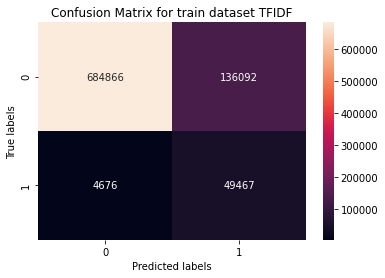

In [18]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_train_tfidf=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

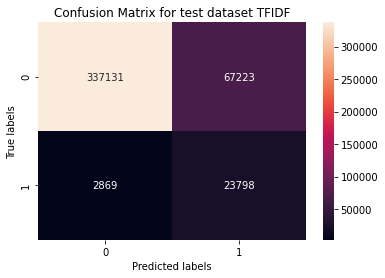

In [19]:
#Test Confusion Matrix
cm_test_tfidf=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [20]:
#Feature Names for Tfidf
feature_names_tfidf=[]
feature_names_tfidf.extend(unique_words)
feature_names_tfidf.extend(['length'])
feature_names_tfidf.extend(['Total_Words'])
feature_names_tfidf.extend(['Total_stopwords'])
feature_names_tfidf.extend(['uppercase_count'])
print("Total Number of Features for TFIDF are {0}".format(len(feature_names_tfidf)))

Total Number of Features for TFIDF are 15004


<b>List of top 20 Features for Insincere Questions</b>

In [21]:
positive_class_tfidf=model.feature_log_prob_[1,:].argsort()
reversed_pos_class_tfidf=positive_class_tfidf[::-1]
print(np.take(feature_names_tfidf,reversed_pos_class_tfidf[:20]))

['length' 'uppercase_count' 'Total_Words' 'Total_stopwords' 'why' 'be'
 'people' 'not' 'do' 'trump' 'women' 'men' 'like' 'white' 'muslims' 'how'
 'black' 'think' 'americans' 'quora']


<b>List of top 20 Features for Sincere Questions</b>

In [22]:
negative_class_tfidf=model.feature_log_prob_[0,:].argsort()
reversed_neg_class_tfidf=negative_class_tfidf[::-1]
print(np.take(feature_names_tfidf,reversed_neg_class_tfidf[:20]))

['length' 'uppercase_count' 'Total_Words' 'Total_stopwords' 'what' 'how'
 'be' 'why' 'do' 'get' 'best' 'not' 'can' 'which' 'would' 'use' 'make'
 'like' 'people' 'what best']


<b>Analyzing all the False Positive Points</b>

In [23]:
#Collecting all the False Postitive Points
fp_dict={}
for i in range(0,len(x_test)):
    if y_test.iloc[i]==0 and test_pred[i]==1:
        fp_dict[i]=x_test.iloc[i]

In [24]:
#Creating DataFrame of false positive Points
fp_df=pd.DataFrame(fp_dict)
fp_df=fp_df.T
fp_df.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,pre_essays,bad_words_count,preprocessed_questions
1,f11286729704be4edb40,What does an American speaking European Portug...,62,9,2,1,49,0,what american speaking european portuguese sou...,0,what american speak european portuguese sound ...
9,8edc7009df2f955c7807,Is it wrong to be really disgusted by people w...,97,18,9,1,78,0,is wrong really disgusted people care animals ...,0,be wrong really disgust people care animals hu...
17,0fae92af8c2a61c0c54a,What wast Custers Last Stand really like and t...,85,14,4,1,67,0,what wast custers last stand really like bruta...,0,what wast custers last stand really like bruta...
58,15c3a2fae7bce6c4ce04,A girl having many past boyfriends and hence b...,109,20,6,2,85,0,a girl many past boyfriends hence breakups wan...,0,a girl many past boyfriends hence breakups wan...
69,a91fae87fa559184618d,Why do we love the people that we can't have?,45,10,5,2,33,0,why love people not,0,why love people not


In [25]:
from tqdm import tqdm
import nltk
comment_words=' '
#print(data_sincere.head())
for val in tqdm(fp_df['preprocessed_questions'].values): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

100%|██████████| 67223/67223 [07:10<00:00, 156.15it/s]


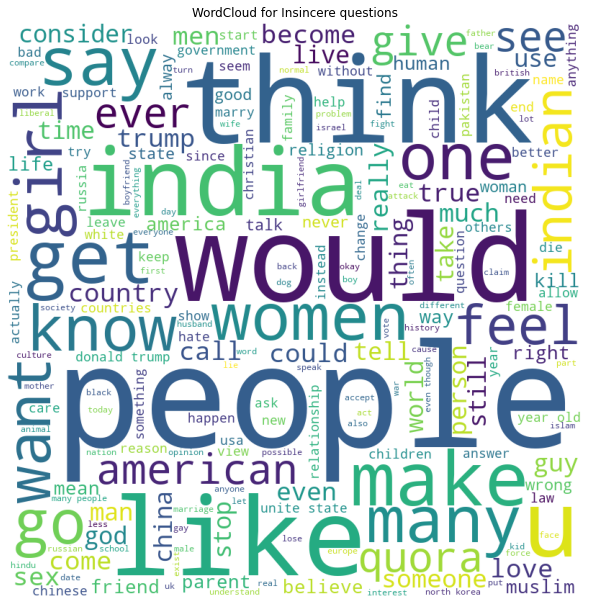

In [26]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for Insincere questions")
plt.show()

<b>Analyzing the False Negative Points</b>

In [27]:
#Collecting all the false Negative Points
fn_dict={}
for i in range(0,len(x_test)):
    if y_test.iloc[i]==1 and test_pred[i]==0:
        fn_dict[i]=x_test.iloc[i]

In [28]:
fn_df=pd.DataFrame(fn_dict)
fn_df=fn_df.T
fn_df.head()

,qid,question_text,Length,Total_Words,Total_stopwords,punctuations_count,uppercase_count,num_exclamation_marks,pre_essays,bad_words_count,preprocessed_questions
141,52b00e9f6f5e38adcd86,"Who has more overrated TV programs, movies, mu...",121,18,6,4,93,0,who overrated tv programs movies music kinds e...,0,who overrate tv program movies music kinds ent...
533,80f72d58143cb5dc2da2,Where can I find nude pictures of an Indian wo...,50,10,3,1,37,0,where i find nude pictures indian woman,0,where i find nude picture indian woman
790,49c386412c2ce2bba018,How can I get myself kidnapped by real live va...,53,10,3,1,41,0,how i get kidnapped real live vampires,0,how i get kidnap real live vampires
1385,a83518fe5749df31d19a,"Which is more immoral, drowning puppies or vac...",61,9,3,2,50,0,which immoral drowning puppies vacuuming fetuses,0,which immoral drown puppies vacuum fetuses
1564,167ddc7edef19f08c554,What are some books and resources on the polit...,94,15,8,2,77,0,what books resources politics anti semitism ho...,0,what book resources politics anti semitism hol...


In [29]:
from tqdm import tqdm
import nltk
comment_words=' '
#print(data_sincere.head())
for val in tqdm(fn_df['preprocessed_questions'].values): 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

100%|██████████| 2869/2869 [00:00<00:00, 10625.98it/s]


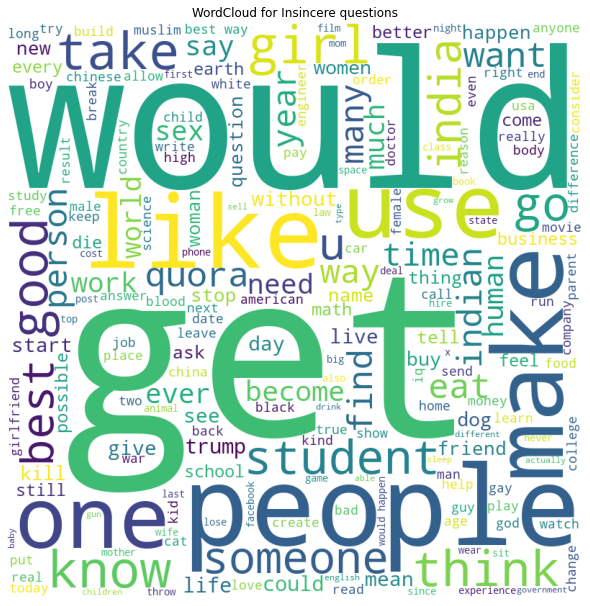

In [30]:
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("WordCloud for Insincere questions")
plt.show()

In [31]:
import pickle
pickle.dump(model,open('Naive_Bayes.p','wb'))
pickle.dump(fp_df,open('fp_df.p','wb'))
pickle.dump(fn_df,open('fn_df.p','wb'))
pickle.dump(vec,open('tfidf_vec.p','wb'))

<h1>Applying Min-Max Normalization on Numerical Features</h1>

In [32]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Length'].values.reshape(-1,1))

x_train_len_norm = normalizer.transform(x_train['Length'].values.reshape(-1,1))
x_test_len_norm = normalizer.transform(x_test['Length'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_len_norm.shape, y_train.shape)
print(x_test_len_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [33]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Total_Words'].values.reshape(-1,1))

x_train_words_norm = normalizer.transform(x_train['Total_Words'].values.reshape(-1,1))
x_test_words_norm = normalizer.transform(x_test['Total_Words'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_words_norm.shape, y_train.shape)
print(x_test_words_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [34]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['Total_stopwords'].values.reshape(-1,1))

x_train_stopwords_norm = normalizer.transform(x_train['Total_stopwords'].values.reshape(-1,1))
x_test_stopwords_norm = normalizer.transform(x_test['Total_stopwords'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_stopwords_norm.shape, y_train.shape)
print(x_test_stopwords_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


In [35]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['uppercase_count'].values.reshape(-1,1))

x_train_upper_norm = normalizer.transform(x_train['uppercase_count'].values.reshape(-1,1))
x_test_upper_norm = normalizer.transform(x_test['uppercase_count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_upper_norm.shape, y_train.shape)
print(x_test_upper_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(875101, 1) (875101,)
(431021, 1) (431021,)


<h1>Preparing Data Models</h1>

In [36]:
from scipy.sparse import hstack

x_train_tfidf_lr=hstack((x_train_questions_tfidf,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm)).tocsr()
x_test_tfidf_lr=hstack((x_test_questions_tfidf,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

(875101, 15004) (875101,)
(431021, 15004) (431021,)


<h1>Logistic Regression</h1>

<b>HyperParameter tuning on GridSearchCv</b>

In [37]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

alpha=[10**(-4),10**(-3),10**(-2),10**(-1),1,10,100,1000,10000]
model=SGDClassifier(loss='log',penalty='l1',fit_intercept=True,class_weight='balanced')
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf_lr,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=SGDClassifier(class_weight='balanced', loss='log',
                                     penalty='l1'),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='f1', verbose=10)

In [38]:
clf.best_estimator_

SGDClassifier(class_weight='balanced', loss='log', penalty='l1')

In [39]:
from sklearn.metrics import f1_score
model_lr=SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

model_lr.fit(x_train_tfidf_lr,y_train)

train_pred=model_lr.predict(x_train_tfidf_lr)
test_pred=model_lr.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

TypeError: __init__() got an unexpected keyword argument 'n_iter'

In [ ]:
#Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm_train_tfidf_lr=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:
cm_test_tfidf_lr=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

In [ ]:
import pickle
pickle.dump(model_lr,open('lr.p','wb'))
pickle.dump(x_train_tfidf_lr,open('train_data_model.p','wb'))
pickle.dump(x_train_tfidf_lr,open('test_data_model.p','wb'))

<h1>Feature Engineering</h1>

<b>1. Computing Sentiment Scores</b>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

In [ ]:
def get_Sentiment_Score(df):
    neutral_values=[]
    pos_values=[]
    neg_values=[]
    comp_values=[]
    for question in tqdm(df['question_text'].values):
        ss=sid.polarity_scores(question)
        neutral_values.append(ss['neu'])
        neg_values.append(ss['neg'])
        pos_values.append(ss['pos'])
        comp_values.append(ss['compound'])
    return neutral_values,pos_values,neg_values,comp_values

In [ ]:
neu_train,neg_train,pos_train,comp_train=get_Sentiment_Score(x_train)

In [ ]:
neu_test,neg_test,pos_test,comp_test=get_Sentiment_Score(x_test)

In [ ]:
#Adding Sentiment Features in train and test Dataset
x_train['neu_score']=neu_train
x_train['neg_score']=neg_train
x_train['pos_score']=pos_train
x_train['comp_score']=comp_train

x_test['neu_score']=neu_test
x_test['neg_score']=neg_test
x_test['pos_score']=pos_test
x_test['comp_score']=comp_test

<b>2. Number of Unique Words in Question</b>

In [ ]:
#Number of Unique Words in Question
x_train['num_unique_words'] = x_train['question_text'].apply(
    lambda question: len(set(w for w in question.split())))

x_test['num_unique_words'] = x_test['question_text'].apply(
    lambda question: len(set(w for w in question.split())))

<b>3. Proportion of Unique Words in Question</b>

In [ ]:
#Proportion of Number of Unique Words
x_train['words_vs_unique'] = x_train['num_unique_words'] / x_train['Total_Words']
x_test['words_vs_unique'] = x_test['num_unique_words'] / x_test['Total_Words']

In [ ]:
x_train.head()

In [ ]:
import pickle
pickle.dump(x_train,open('train_feature_df.p','wb'))
pickle.dump(x_test,open('test_feature_df.p','wb'))

In [ ]:
import pickle
x_train=pickle.load(open('train_feature_df.p','rb'))
x_test=pickle.load(open('test_feature_df.p','rb'))

In [ ]:
x_test.head()

<b>Bad Words Count for each Question</b>

In [ ]:
#Reading text file which contains the list of bad words provided by Google
bad_words = pd.read_csv('words_bad.txt', sep=",", header=None)
words=bad_words.columns

In [ ]:
bad_words_arr=bad_words.iloc[0].tolist()

In [ ]:
final_bad_words=[]
for word in bad_words_arr:
    word=word.strip() #Removing extra spaces from the words
    final_bad_words.append(word)

In [ ]:
def count_bad_words(question):
    count=0;
    for word in question.split(" "):
        if word in final_bad_words:
            #print(word)
            count=count+1
    return count

In [ ]:
x_train['bad_words_count']=x_train['question_text'].apply(lambda ques:count_bad_words(ques))

In [ ]:
x_test['bad_words_count']=x_test['question_text'].apply(lambda ques:count_bad_words(ques))

<b>Generating ratio of bad words for each the question</b>

In [ ]:
x_train['bad_word_count_ratio']=x_train['bad_words_count']/x_train['Total_Words']
x_test['bad_word_count_ratio']=x_test['bad_words_count']/x_test['Total_Words']

In [ ]:
pickle.dump(x_train,open('train_feature_df.p','wb'))
pickle.dump(x_test,open('test_feature_df.p','wb'))

In [ ]:
x_train=pickle.load(open('train_feature_df.p','rb'))
x_test=pickle.load(open('test_feature_df.p','rb'))

In [ ]:
x_train.head()

In [ ]:
#Preparing y_train
y_train=[quora_data.iloc[x]['target'] for x in x_train.index]

In [ ]:
#Preparing y_test
y_test=[quora_data.iloc[x]['target'] for x in x_test.index]

In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [ ]:
pickle.dump(y_train,open('train_labels.p','wb'))
pickle.dump(y_test,open('test_labels.p','wb'))

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['bad_words_count'].values.reshape(-1,1))

x_train_bad_word_norm = normalizer.transform(x_train['bad_words_count'].values.reshape(-1,1))
x_test_bad_word_norm = normalizer.transform(x_test['bad_words_count'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_bad_word_norm.shape, y_train.shape)
print(x_test_bad_word_norm.shape, y_test.shape)
print("="*100)

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer=Normalizer()
normalizer.fit(x_train['num_unique_words'].values.reshape(-1,1))

x_train_unique_norm = normalizer.transform(x_train['num_unique_words'].values.reshape(-1,1))
x_test_unique_norm = normalizer.transform(x_test['num_unique_words'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_unique_norm.shape, y_train.shape)
print(x_test_unique_norm.shape, y_test.shape)
print("="*100)

<b>TFIDF Representation with 4-grams and 30k features</b>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(ngram_range=(1,4),min_df=8,max_features=30000,use_idf=True,norm='l2') #Generating trigrams
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_tfidf.shape,y_train.shape)
print(x_test_questions_tfidf.shape,y_test.shape)

In [ ]:
import pickle
pickle.dump(vec,open('tfidf_vec.p','wb'))

In [ ]:
vec=pickle.load(open('tfidf_best_vec.p','rb'))
x_train_questions_tfidf=vec.fit_transform(x_train['preprocessed_questions'])
x_test_questions_tfidf=vec.transform(x_test['preprocessed_questions'])

In [ ]:
x_train.head()

In [ ]:


x_train_punc_count=get_num_transpose(x_train,'punctuations_count')
x_test_punc_count=get_num_transpose(x_test,'punctuations_count')

x_train_bad_count_ratio=get_num_transpose(x_train,'bad_word_count_ratio')
x_test_bad_count_ratio=get_num_transpose(x_test,'bad_word_count_ratio')

x_train_words_vs_unique=get_num_transpose(x_train,'words_vs_unique')
x_test_words_vs_unique=get_num_transpose(x_test,'words_vs_unique')


In [ ]:
y_train.columns=['Target']
y_test.columns=['Target']

<b>Preparing Data Models</b>

In [ ]:
from scipy.sparse import hstack

x_train_tfidf_lr=hstack((x_train_questions_tfidf,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm,x_train_bad_count_ratio,x_train_words_vs_unique,x_train_punc_count,x_train_unique_norm,x_train_bad_word_norm)).tocsr()
x_test_tfidf_lr=hstack((x_test_questions_tfidf,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm,x_test_bad_count_ratio,x_test_words_vs_unique,x_test_punc_count,x_test_unique_norm,x_test_bad_word_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

In [ ]:
pickle.dump(x_train_tfidf_lr,open('best_till_now_data_model_train','wb'))
pickle.dump(x_test_tfidf_lr,open('best_till_now_data_model_test','wb'))

In [ ]:
import pickle
x_train_tfidf_lr=pickle.load(open('best_till_now_data_model_train','rb'))
x_test_tfidf_lr=pickle.load(open('best_till_now_data_model_test','rb'))

y_train=pickle.load(open('y_train.p','rb'))
y_test=pickle.load(open('y_test.p','rb'))

<b>Applying Logistic Regression</b>

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=SGDClassifier(loss='log',penalty='l2',class_weight='balanced',fit_intercept=True)
clf_grid=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf_grid.fit(x_train_tfidf_lr,y_train)

In [ ]:
train_f1= clf_grid.cv_results_['mean_train_score']
train_f1_std= clf_grid.cv_results_['std_train_score']
cv_f1 = clf_grid.cv_results_['mean_test_score'] 
cv_f1_std= clf_grid.cv_results_['std_test_score']

plt.plot(np.log10(parameters['alpha']), train_f1, label='Train F1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['alpha']),train_f1 - train_f1_std,train_f1 + train_f1_std,alpha=0.2,color='darkblue')

plt.plot(np.log10(parameters['alpha']), cv_f1, label='CV F1')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(np.log10(parameters['alpha']),cv_f1 - cv_f1_std,cv_f1 + cv_f1_std,alpha=0.2,color='darkorange')

plt.scatter(np.log10(parameters['alpha']), train_f1, label='Train F1 points')
plt.scatter(np.log10(parameters['alpha']), cv_f1, label='CV F1 points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("F1")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
print(clf_grid.best_params_)

In [ ]:
print(clf_grid.best_score_)

In [ ]:
clf_grid.best_estimator_

In [ ]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_f.fit(x_train_tfidf_lr,y_train)

y_train_pred=model_lr_f.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_lr_f.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_f.predict(x_train_tfidf_lr)
test_pred=model_lr_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
pickle.dump(model_lr_f,open('model_lr_f_best.p','wb'))

In [ ]:
y_train_pred

In [ ]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)
y_train_lst=y_train['Target'].tolist()
y_test_lst=y_test['Target'].tolist()

In [ ]:
def predict_test(proba,val):
    
    #t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=val:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [ ]:
y_predict_test=predict_test(y_test_pred)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
train

In [ ]:
print("Train F1-Score using 30k Features with 4grams {0}".format(train_f1_score))
print("Test F1-Score using 30k Features with 4grams {0}".format(test_f1_score))

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_lr=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:
cm_test_tfidf_lr=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_lr, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

Precision for Class 1 has improved as compared to previous Models.

In [ ]:
#Using predict method of sklearn
best_alpha=10**0
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_f.fit(x_train_tfidf_lr,y_train)

y_train_pred=model_lr_f.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_lr_f.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_f.predict(x_train_tfidf_lr)
test_pred=model_lr_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

In [ ]:
pickle.dump(model_lr_f,open('model_lr_1.p','wb'))

<b>Feature Importances</b>

In [ ]:
#Collecting all the features(i.e 30k text features generated using TF-IDF and other 9 features)
features_lr=[]
features_lr.extend(vec.get_feature_names())
features_lr.extend(['Length'])
features_lr.extend(['Total_Word'])
features_lr.extend(['Total_stopwords'])
features_lr.extend(['Uppercase_Count'])
features_lr.extend(['bad_words_ratio'])
features_lr.extend(['unique_words_ratio'])
features_lr.extend(['Punctuation_Count'])
features_lr.extend(['Unique_Words'])
features_lr.extend(['bad_words_count'])

In [ ]:
print("Total Features Considered While training the Model {}".format(len(features_lr)))

In [ ]:
features_dict=dict(zip(features_lr,np.array(model_lr_f.coef_).T))
sorted_dict = [(k, features_dict[k]) for k in sorted(features_dict, key=features_dict.get, reverse=True)]
sorted_dict=dict(sorted_dict)
top20_f=list(sorted_dict.keys())
print("List of top 20 important features that model Detected")
print("="*120)
print(top20_f[0:30])

Words related to religions,Caste,Politics and Sexual Content are important to detect the sincerity of the question

<h1>Applying RandomForest</h1>

<h2>HyperParameter Tuning using GridSearchCV</b>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,5,10,15,20],'n_estimators':[10,50,80,100,200]}
rf=RandomForestClassifier(class_weight='balanced',bootstrap=True)
grid_clf=GridSearchCV(estimator=rf,verbose=10,param_grid=parameters,n_jobs=-1,scoring='f1',return_train_score=True)
grid_clf.fit(x_train_tfidf_lr,y_train)

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.best_score_

In [ ]:
grid_clf.best_estimator_

<h3>Applying Random Forest</h3>

In [ ]:
#Using the already implemented predict() of sklearn
rf_f=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=20, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

rf_f.fit(x_train_tfidf_lr,y_train)
train_pred=rf_f.predict(x_train_tfidf_lr)
test_pred=rf_f.predict(x_test_tfidf_lr)

train_f1=f1_score(y_train,train_pred)
test_f1=f1_score(y_test,test_pred)

print(train_f1,test_f1)

Random Forest doesnt seem to be performing well as compared to Logistic Regression

<h1>Applying Gradient Boosted Decision Tree Model</h1>

<h2>Hyperparameter Tuning using GridSearchCV</h2>

In [ ]:
import lightgbm as lgb
import xgboost as xgb
parameters={'max_depth':[1,2,4,5,8,10,14,20],'n_estimators':[10,50,100,200]}
model=xgb.XGBClassifier(random_state=42,booster='gbtree',n_jobs=-1)
grid_clf=GridSearchCV(estimator=model,verbose=10,param_grid=parameters,n_jobs=-1,scoring='f1',return_train_score=True)
grid_clf.fit(x_train_tfidf_lr,y_train)

In [ ]:
print(grid_clf.best_params_)

In [ ]:
print(grid_clf.best_score_)

In [ ]:
print(grid_clf.best_estimator_)

<b>Applying Gradient Boosted Decision Tree</b>

<b>Applying Gradient Boosted Decision Tree Model</b>

In [ ]:
#Using the already implemented predict() of sklearn
import xgboost as xgb

model_xgb=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=42, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)
model_xgb.fit(x_train_tfidf_lr,y_train)

train_pred=model_xgb.predict(x_train_tfidf_lr)
test_pred=model_xgb.predict(x_test_tfidf_lr)


In [ ]:
#Using the already implemented predict() of sklearn
print("Train F1 Score {0}".format(f1_score(y_train,train_pred)))
print("Test F1 Score {0}".format(f1_score(y_test,test_pred)))

In [ ]:
#Using the manual function to predict for  finding the best threshold
y_train_pred=model_xgb.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_xgb.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [ ]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)

In [ ]:
#Using the manual Function for finding the best threshold
y_predict_test=predict_test(y_test_pred,0.092)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
test

In [ ]:
print("Train F1 Score using manual implemenation of predict() {}".format(train))
print("Test F1 Score using manual implemenation of predict() {}".format(test))

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_xgb=confusion_matrix(y_train,y_predict_train)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_xgb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:
cm_test_tfidf_xgb=confusion_matrix(y_test,y_predict_test)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_xgb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for test dataset TFIDF'); 

In [ ]:
print(classification_report(y_test,y_predict_test))

In [ ]:
pickle.dump(rf_f,open('rf_f.p','wb')) 

In [ ]:
pickle.dump(model_xgb,open('xgb.p','wb'))

In [ ]:
pickle.dump(model_lr_f,open('best_lr.p','wb'))
pickle.dump(vec,open('tfidf_best_vec.p','wb'))

In [ ]:
pickle.dump(y_train,open('target_train.p','wb'))
pickle.dump(y_test,open('target_test.p','wb'))

<h3>Naive Bayes</h3>

In [ ]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
model=MultinomialNB(fit_prior=True,class_prior=[0.5,0.5])
clf=GridSearchCV(model,param_grid=parameters,cv=3,verbose=10,n_jobs=-1,scoring='f1')
clf.fit(x_train_tfidf_lr,y_train)

In [ ]:
print(clf.best_estimator_)

In [ ]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)
model_nb.fit(x_train_tfidf_lr,y_train)

train_pred=model_nb.predict(x_train_tfidf_lr)
test_pred=model_nb.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
pickle.dump(model_nb,open('best_nb.p','wb'))

In [ ]:
#Using manual predict function
#Using the manual function to predict for  finding the best threshold
y_train_pred=model_nb.predict_proba(x_train_tfidf_lr)[:,1]
y_test_pred=model_nb.predict_proba(x_test_tfidf_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

In [ ]:
y_predict_train=predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)

In [ ]:
#Using the manual Function for finding the best threshold
y_predict_test=predict_test(y_test_pred,0.57)
test=f1_score(y_test_lst,y_predict_test)
train=f1_score(y_train_lst,y_predict_train)
test

In [ ]:
#Using the manual function for finding the best threshold for Naive Bayes
print("Train F1 score using the manual predict() is {}".format(train))
print("Test F1 score using the manual predict() is {}".format(test))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

<b>Train Confusion Matrix</b>

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_nb=confusion_matrix(y_train,y_predict_train)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:

cm_test_tfidf_nb=confusion_matrix(y_test,y_predict_test)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

<b>Feature Importances for Positive Class</b>

In [ ]:
positive_class_tfidf=model_nb.feature_log_prob_[1,:].argsort()
reversed_pos_class_tfidf=positive_class_tfidf[::-1]
print(np.take(features_lr,reversed_pos_class_tfidf[:30]))

<b>Feature Importances for Negative Class</b>

In [ ]:
negative_class_tfidf=model_nb.feature_log_prob_[0,:].argsort()
reversed_neg_class_tfidf=negative_class_tfidf[::-1]
print(np.take(features_lr,reversed_neg_class_tfidf[:30]))

In [ ]:
print(classification_report(y_test,y_predict_test))

In [ ]:
pickle.dump(model_nb,open('model_naive.p','wb'))

In [ ]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb=MultinomialNB(alpha=10**(-5), class_prior=[0.5, 0.5], fit_prior=True)
model_nb.fit(x_train_tfidf_lr,y_train)

train_pred=model_nb.predict(x_train_tfidf_lr)
test_pred=model_nb.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

In [ ]:
pickle.dump(model_nb,open('model_nb_not_best.p','wb'))

<b>Observations and Conclusions</b>

In [ ]:
#After Doing Feature Engineering
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Model','Vectorizer','HyperParameter','F1-Score']
x.add_row(['Naive Bayes','TFIDF','1',0.45])
x.add_row(['Logistic Regression','TFIDF','0.00001','0.51'])
x.add_row(['Random Forest','TFIDF',[20,200],'0.401'])
x.add_row(['GBDT','TFIDF',[20,200],'0.52'])

print(x)

1.On applying GBDT little overfitting was seen Since the difference between the train f1 score and test f1 score was large as compared to other models<br>
2.Performance of Logistic Regression and GBDT is almost equal.

<b>Using CountVectorizer</b>'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec_cnt=CountVectorizer(ngram_range=(1,4),min_df=8,max_features=30000) #Generating trigrams
x_train_questions_cnt=vec_cnt.fit_transform(x_train['preprocessed_questions'])
x_test_questions_cnt=vec_cnt.transform(x_test['preprocessed_questions'])

print("Shapes After Performing Vectorization")
print(x_train_questions_cnt.shape,y_train.shape)
print(x_test_questions_cnt.shape,y_test.shape)

In [ ]:
pickle.dump(x_train_questions_cnt,open('cv_fit.p','wb'))

In [ ]:
cv_fit=pickle.load(open('cv_fit.p','wb'))
cnt_features=tfidf_vect.get_feature_names()
cv_fit=pickle.load(open('cv_fit.p','rb'))
            count_vals=cv_fit.toarray().sum(axis=0)
            count_zip=dict(zip(cnt_features,count_vals))
            print(count_zip.keys())
            for word in word_list:
                if word in count_zip.keys():
                    data_dict[word]=count_zip[word]

In [ ]:
pickle.dump(vec_cnt,open('count_vec.p','wb'))

In [ ]:
from scipy.sparse import hstack

x_train_cnt_lr=hstack((x_train_questions_cnt,x_train_len_norm,x_train_words_norm,x_train_stopwords_norm,x_train_upper_norm,x_train_bad_count_ratio,x_train_words_vs_unique,x_train_punc_count,x_train_unique_norm,x_train_bad_word_norm)).tocsr()
x_test_cnt_lr=hstack((x_test_questions_cnt,x_test_len_norm,x_test_words_norm,x_test_stopwords_norm,x_test_upper_norm,x_test_bad_count_ratio,x_test_words_vs_unique,x_test_punc_count,x_test_unique_norm,x_test_bad_word_norm)).tocsr()

print(x_train_tfidf_lr.shape,y_train.shape)
print(x_test_tfidf_lr.shape,y_test.shape)

In [ ]:
#using the predict() of sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
model_nb_cnt=MultinomialNB(alpha=1, class_prior=[0.5, 0.5], fit_prior=True)
model_nb_cnt.fit(x_train_cnt_lr,y_train)

train_pred=model_nb_cnt.predict(x_train_cnt_lr)
test_pred=model_nb_cnt.predict(x_test_cnt_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

In [ ]:
pickle.dump(model_nb_cnt,open('model_nb_count_nest.p','wb'))

In [ ]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_lr_cnt=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_lr_cnt.fit(x_train_cnt_lr,y_train)

y_train_pred=model_lr_cnt.predict_proba(x_train_cnt_lr)[:,1]
y_test_pred=model_lr_cnt.predict_proba(x_test_cnt_lr)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

train_pred=model_lr_cnt.predict(x_train_tfidf_lr)
test_pred=model_lr_cnt.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

In [ ]:
pickle.dump(model_lr_cnt,open('model_lr_best_count.p','wb'))

<b>Training an SVM Classifier</b>

In [ ]:
#Using predict method of sklearn
best_alpha=10**(-5)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import SGDClassifier
model_sv_f=SGDClassifier(alpha=0.00001,class_weight='balanced',average=False,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
model_sv_f.fit(x_train_tfidf_lr,y_train)

train_pred=model_sv_f.predict(x_train_tfidf_lr)
test_pred=model_sv_f.predict(x_test_tfidf_lr)

train_f1_score=f1_score(y_train,train_pred)
test_f1_score=f1_score(y_test,test_pred)

print(train_f1_score,test_f1_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred,target_names=['Sincere','Insincere']))

In [ ]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_train_tfidf_nb=confusion_matrix(y_train,train_pred)
ax= plt.subplot()
sns.heatmap(cm_train_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:
cm_test_tfidf_nb=confusion_matrix(y_test,test_pred)
ax= plt.subplot()
sns.heatmap(cm_test_tfidf_nb, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for train dataset TFIDF'); 

In [ ]:
pickle.dump(model_sv_f,open('model_sv_f.p','wb'))